<a href="https://colab.research.google.com/github/Manav1918/cloth_segmentation/blob/main/Cloths_segmentation_CID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Helper Functions

In [ ]:
!pip install iglovikov_helper_functions

In [ ]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

Installing cloth segmentation module from pypi

In [ ]:
!pip install cloths_segmentation  > /dev/null

In [ ]:
%matplotlib inline

Importing necessary modules

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import torch

In [ ]:
import albumentations as albu

In [ ]:
from pylab import imshow

In [ ]:
#trying to save on google drive, so, mounting it to my google drive
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive

If you want to use cloth segmentation on images from gallary, run below code

In [ ]:

from google.colab import files
img = files.upload()
keys = list(img) # list of all image names from dictionary of images uploaded
allowefileformats = ['jpg','png','bmp','jpeg']
if len(img)!=1:
  print('Please Select only one image file')

elif keys[0].split('.')[-1] not in allowefileformats:
  print('Please select an image in formats: ',allowefileformats)

img_data = img[keys[-1]]
img_path = 'gdrive/My Drive/Colab Notebooks/Cloth_Segmentation_Project/cloths segs data/'+keys[-1] # set root path to folder where you uploaded the data
with open(img_path,'wb') as f:
  f.write(img_data)
#image = load_rgb(img_path) #if this line will be uncommented, comment out below three lines

#from PIL import Image
#from io import BytesIO
#image = Image.open(BytesIO(img[keys[0]]))#----- this is related to below line

Program to open web camera in google colab and take picture.

If you want to use cloth segmentation on webcam captured image, run below code

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  img_path = 'gdrive/My Drive/Colab Notebooks/Cloth_Segmentation_Project/cloths segs data/'+filename # set root path to folder where you uploaded the data
  with open(img_path, 'wb') as f:
    f.write(binary)
  return img_path

Calling Above function to run and capture the photo.

In [ ]:
from IPython.display import Image
try:
  img_path = take_photo()
  print('Saved to {}'.format(img_path))
  
  # Show the image which was just taken.
  display(Image(img_path))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Importing Important things from helper functions

In [ ]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [ ]:
from cloths_segmentation.pre_trained_models import create_model

In [ ]:
model = create_model("Unet_2020-10-30")

In [ ]:
model.eval();

In [ ]:
image = load_rgb(img_path)

In [ ]:
#print(img)
print(img)

#files.view(keys[-1])
#image = np.array(image)

In [ ]:
#trying to 
#imshow(image)
#files.download('pankaj.png')
imshow(image)

In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [ ]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [ ]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [ ]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [ ]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [ ]:
mask = unpad(mask, pads)

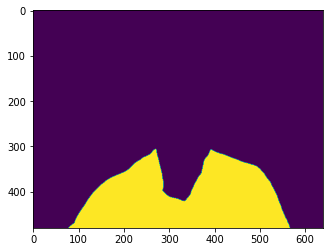

In [ ]:
imshow(mask)

In [ ]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

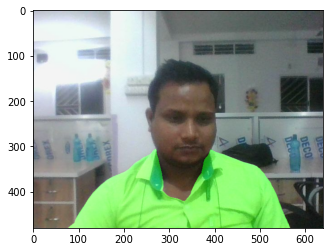

In [ ]:
imshow(dst)

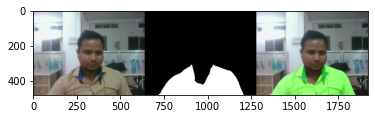

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))